![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the BSc-level course **Mechanical Properties of Loose Rocks and Soils**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# Triaxialversuch

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import patches

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/Triaxial_plots.ipynb

Folgende Ergebnisse aus drei CU Versuchen seien gegeben.

* Konsolidierungsspannung: $\sigma_\text{c} = \left\{120, 234, 450 \right\}\,$kPa
* Backpressure: $u_0 = 0\,$kPa
* Porenwasserüberdruck im Bruchpunkt: $\Delta u = \left\{90, 154, 297 \right\}\,$kPa
* Axiale Spannungen im Bruchzustand: $\sigma_\text{1f} = \left\{293, 587, 975 \right\}\,$kPa

Anmerkung: wenn hier mit $u_0 > 0$ gerechnet werden sollte, so sind die Sättigungsdrücke zu den obigen Totalspannungsgrößen und den neutralen Spannungen hinzuzuaddieren.

**Aufgaben:**

* Zeichnen Sie die Mohr'schen Spannungskreise im Bruchzustand und bestimmen Sie graphisch die effektiven Scherfestigkeitsparameter $c'$ und $\varphi'$.
* Bestimmen Sie graphisch die Normal- und Schubspannungen auf der Bruchfläche und sowie deren Orientierung unter Verwendung der Mohr'schen Spannungskreise ab.
* Zeichnen Sie die die totalen und effektiven Spannungspfade im $(\sigma_1-\sigma_3)/2$--$(\sigma_1+\sigma_3)/2$ bzw. $(\sigma_1'-\sigma_3')/2$--$(\sigma_1+\sigma_3)/2$ Diagramm (verwenden Sie ein und dasselbe Diagramm).
* Leiten Sie auch aus der letzten Darstellung die effektiven Scherfestigkeitsparameter graphisch ab.


## Lösung:

Wir bestimmen zunächst die effektiven Hauptspannungen im Bruchzustand:

\begin{align}
    \sigma_\text{1f}' &= \sigma_\text{1f} - (u_0 + \Delta u)
    \\
    \sigma_\text{3f}' &= \sigma_\text{3f} - (u_0 + \Delta u)
\end{align}

In [14]:
#gegebene Größen
s_1f = np.array([293,587,975])
s_3f = np.array([120,234,450])
u_f = np.array([90,154,297])

#back pressure
u_0 = np.array([0,0,0])
s_1f += u_0
s_3f += u_0
u_f += u_0

In [15]:
s_1fe = s_1f - u_f
s_3fe = s_3f - u_f
print('Größte effektive Hauptspannungen beim Bruch in kPa: ', s_1fe)
print('Kleinste effektive Hauptspannungen beim Bruch in kPa: ', s_3fe)

Größte effektive Hauptspannungen beim Bruch in kPa:  [203 433 678]
Kleinste effektive Hauptspannungen beim Bruch in kPa:  [ 30  80 153]


Damit lassen sich die drei Bruchkreise zeichnen.

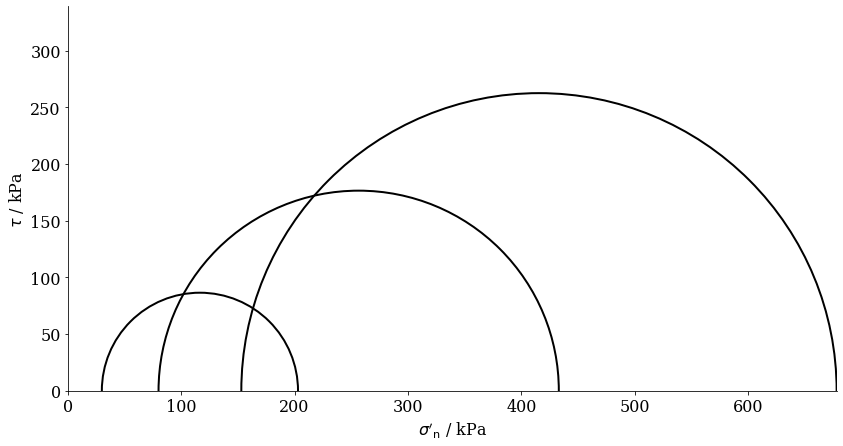

In [16]:
plot_basic_circles(s_1fe,s_3fe)

Wir zeichnen nun eine Gerade, die möglichst gut eine Tangente an die drei Bruchkreise darstellt (eigentlich suchen wir die Einhüllende, die in der Regel gekrümmt ist. Da wir aber für die Mohr-Coulomb'sche Bruchbedingung eine Linearisierung vornehmen, ist die Einhüllende als Gerade festgelegt).

Die Coulomb'sche Bruchbedingung (Gleichung der Grenzgeraden) ist:

$$
    \tau_\text{f} = c' + \sigma_\text{n}' \tan \varphi'
$$

Um den Zusammenhang zu den Bruchhauptspannungen herzustellen schreiben wir die Mohr-Coulomb'sche Bruchbedingung in der Form:

$$
    \sigma_\text{1f}' = \frac{1+\sin\varphi'}{1-\sin\varphi'} \sigma_\text{3f}' + 2c' \frac{\cos \varphi'}{1-\sin\varphi'}
$$

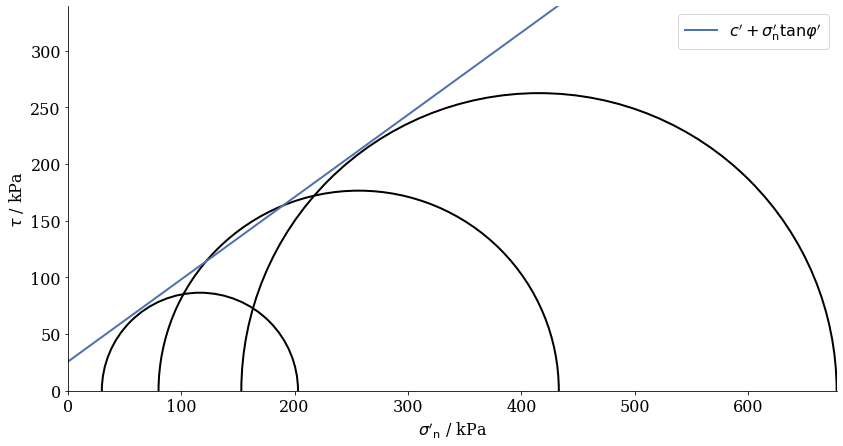

In [17]:
plot_circles_tangent(s_1fe,s_3fe)

Wir sehen, dass die Gerade nur eine Näherung darstellt. Dementsprechend gibt es zeichnerisch einen gewissen Spielraum, der sich in einer Streuung der Ergebnisse von $c'$ und $\varphi'$ niederschlägt. Mathematisch lässt sich mittels des Fehlerquadratminimums eine optimale Ausgleichsgerade finden.

In [18]:
sinphi, c = find_c_sinphi(s_1fe,s_3fe)
print("Die (effektive) Kohäsion beträgt %.1f kPa" %c)
print("Der (effektive) Reibungswinkel beträgt %.1f °" %np.rad2deg(np.arcsin(sinphi)))

Die (effektive) Kohäsion beträgt 25.6 kPa
Der (effektive) Reibungswinkel beträgt 36.0 °


Da die Wirkungsebene von $\sigma_1$ ein horizontaler Schnitt ist, liegt der Pol aller Spannungskreise in $\sigma_3$. Zeichnen wir durch diesen Pol eine Gerade zum Bruchpunkt, so können wir einerseits die in der unter $\vartheta$ zur Horizontalen geneigten Spannungen in der Bruchfläche ablesen, andererseits auch den Winkel $\vartheta$ ablesen, der sich zu

$$
    \vartheta = \frac{\pi}{4} + \frac{\varphi'}{2}
$$

ergibt.

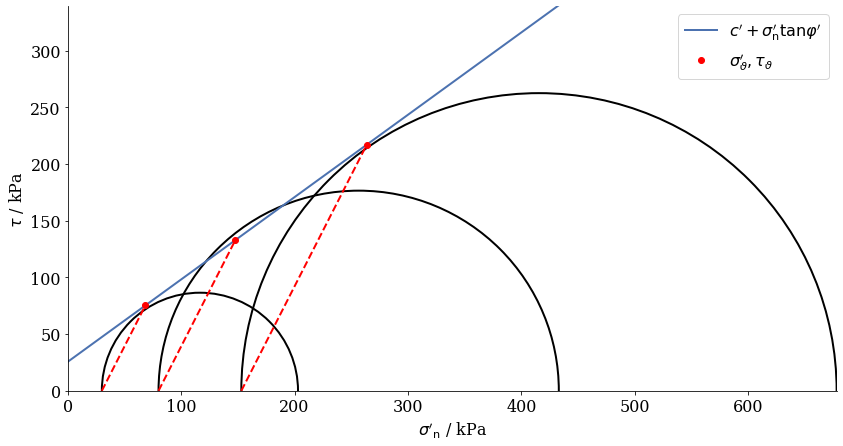

In [19]:
plot_circles_failure(s_1fe,s_3fe)

Es folgt die Darstellung der Spannungspfade. Zunächst werden die Brucheffektivpannungszustände im $(\sigma_1-\sigma_3)/2$--$(\sigma'_1+\sigma'_3)/2$ Diagramm dargestellt. Dazu übertragen wir die Scheitelpunkte der Spannungskreise in die neue Darstellung. Verbindet man die Punkte durch eine Gerade der Gleichung

$$
    \frac{\sigma_1-\sigma_3}{2} = \frac{\sigma'_1+\sigma'_3}{2} \tan \alpha' + b',
$$

so können die Anstiege $m = \tan \alpha'$ und der Ordinatenabschnitt $b'$ ermittelt werden. Durch Vergleich mit der Mohr-Coulomb'schen Bruchbedingung in der Form

$$
    \frac{\sigma_1-\sigma_3}{2} = \frac{\sigma'_1+\sigma'_3}{2} \sin \varphi' + c' \cos \varphi'
$$

ergibt sich die Umrechnung

$$
    \varphi' = \arcsin ( \tan \alpha') \qquad c' = \frac{b'}{\cos \varphi'}
$$

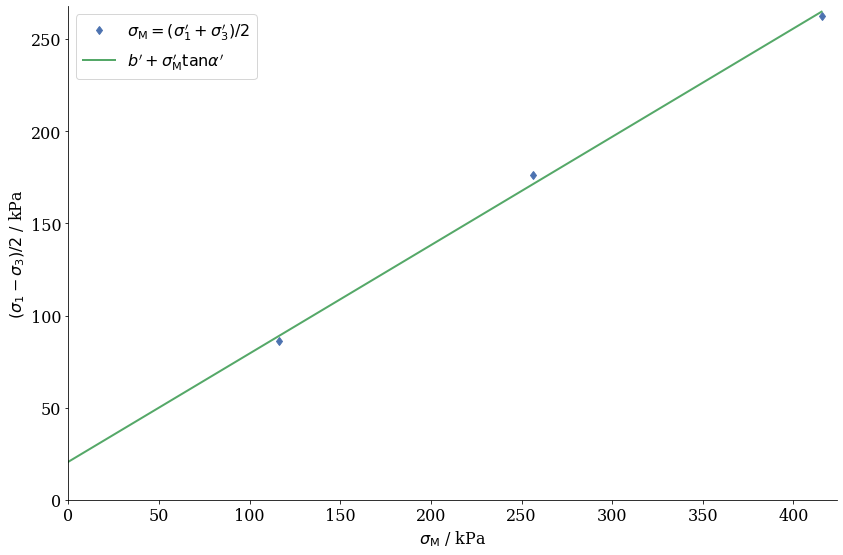

In [20]:
plot_pq(s_1fe,s_3fe)

In [21]:
tanalpha, b = find_b_tanalpha(s_1fe,s_3fe)
print("Der Orinatenabschnitt b' beträgt %.1f kPa" %b)
print("Der Winkel alpha beträgt %.1f °" %np.rad2deg(np.arctan(tanalpha)))

rw = np.arcsin(tanalpha)
print("Die (effektive) Kohäsion beträgt somit %.1f kPa" %(b/np.cos(rw)))
print("Der (effektive) Reibungswinkel beträgt somit %.1f °" %np.rad2deg(np.arcsin(tanalpha)))

Der Orinatenabschnitt b' beträgt 20.7 kPa
Der Winkel alpha beträgt 30.4 °
Die (effektive) Kohäsion beträgt somit 25.6 kPa
Der (effektive) Reibungswinkel beträgt somit 36.0 °


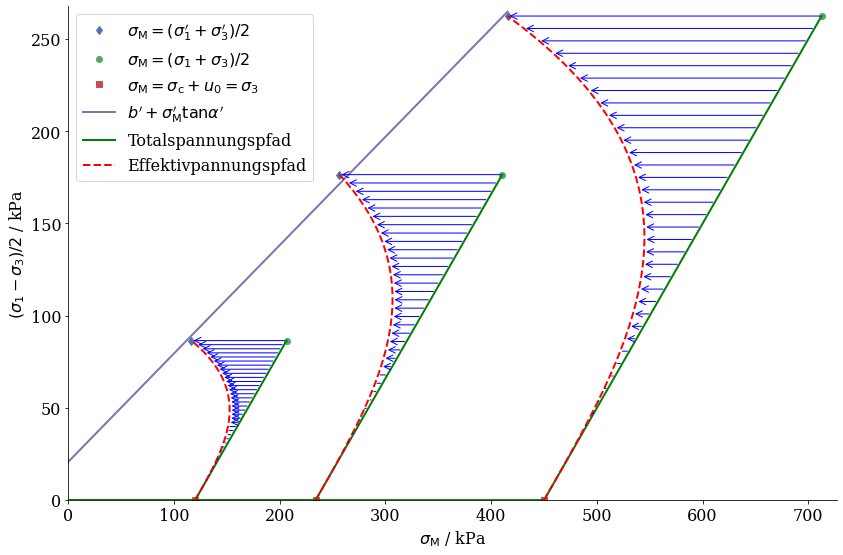

In [22]:
plot_pq_tot(s_1fe,s_3fe,u_f,u_0)

Die totalen und effektiven Spannungspade verlaufen während der Konsolidationsphase entlang der Abszisse (schubspannungsfreier, isotroper Spannungszustand). Während der Scherphase sind die totalen Spannungspfade in der obigen Darstellung um 45° geneigt. Die Differenz aus den totalen und effektiven Spannungspfaden entspricht dem Porenwasserdruck (blaue Pfeile).

Der Vollständigkeit halber stellen wir neben den Effektivspannungskreisen noch die Totalspannungskreise dar und leiten neben den effektiven Scherfestigkeitsparametern $c'$, $\varphi'$ die undrainierten Scherfestigkeitsparameter $c_\text{u}$, $\varphi_\text{u}$ ab.

Achtung: In der Regel werden die undrainierten Werte aus UU Versuchen gewonnen. Die in CU und UU Versuchen ermittelten Werte unterscheiden sich.

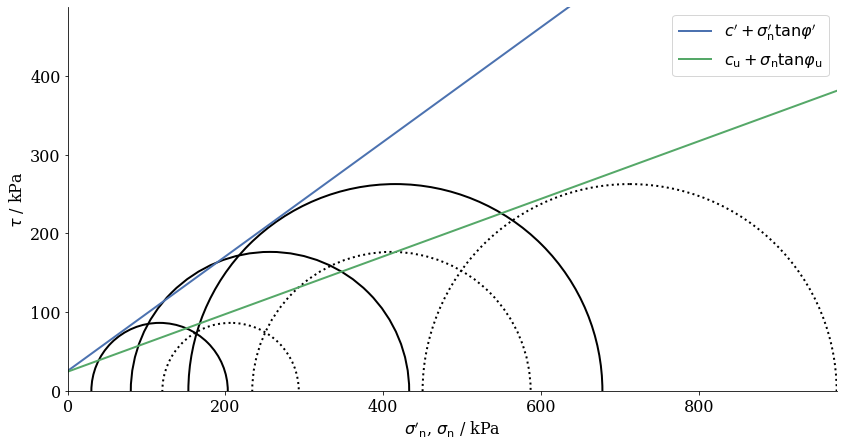

In [23]:
plot_circles_tangent_total(s_1fe,s_3fe,u_f)

In [24]:
tanalpha, b = find_b_tanalpha(s_1fe,s_3fe)
rw = np.arcsin(tanalpha)
print("Die (effektive) Kohäsion beträgt somit %.1f kPa" %(b/np.cos(rw)))
print("Der (effektive) Reibungswinkel beträgt somit %.1f °" %np.rad2deg(np.arcsin(tanalpha)))

tanalphau, bu = find_b_tanalpha(s_1fe+u_f,s_3fe+u_f)
rwu = np.arcsin(tanalpha)
print("\nDie undränierte Kohäsion beträgt somit %.1f kPa" %(bu/np.cos(rwu)))
print("Der undränierte Reibungswinkel beträgt somit %.1f °" %np.rad2deg(np.arcsin(tanalphau)))

Die (effektive) Kohäsion beträgt somit 25.6 kPa
Der (effektive) Reibungswinkel beträgt somit 36.0 °

Die undränierte Kohäsion beträgt somit 28.6 kPa
Der undränierte Reibungswinkel beträgt somit 20.1 °
